<a href="https://colab.research.google.com/github/rpdieego/CreditCard_Fraud_Detection/blob/master/CreditCard_FraudDetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



![alt text](https://github.com/rpdieego/CreditCard_Fraud_Detection/blob/master/0__6WEDnZubsQfTMlY.png?raw=true)

# Step 1 - Defining the Problem

# Step 2 - Getting the Data

In [0]:
# import relevant packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
import matplotlib.cm as cm  
import scipy.stats as stats
from sklearn.preprocessing import StandardScaler
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.model_selection import train_test_split
from imblearn.under_sampling import RandomUnderSampler

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score, roc_curve, accuracy_score

In [0]:
!pip install scikit-plot

In [0]:
import scikitplot as skplt

In [0]:
# Code to read csv file into Colaboratory:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [0]:
# Import creditcard.csv from Google Drive

link = 'https://drive.google.com/open?id=11w6Q2N3ERm7pf_cSo0WkuNSGwi5dsIJ2'

fluff, id = link.split('=')
print (id) # Verify that we have everything after '='

downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('creditcard.csv')  
raw_df = pd.read_csv('creditcard.csv')

11w6Q2N3ERm7pf_cSo0WkuNSGwi5dsIJ2


In [0]:
# Checking the dimensions of the Dataset

print("Dataset \n Variables:\t{}\n Inputs:\t{}".format(raw_df.shape[1], raw_df.shape[0]))
print("\n")

Dataset 
 Variables:	31
 Inputs:	284807




In [0]:
# Displaying the head of the dataset (first 5 elements

raw_df.head(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


# Step 3 - Exploratory Data Analysis (EDA)

**Data Dictionary**

Our dataset had 31 features, where 28 of them are the result of a PCA (Principal Component Analysis) transformation. Unfortunately, due to condidentiality issues, the original features and some more background information were not provided. This features are named V1, V2, V3 and so on, until V28.

The features which haven`t been transformed with the PCA are:

*   *Time* - time in seconds elapsed between each transaction and the first transaction of the dataset;
*   *Amount* - transaction amount;
*   *Class* - Response variable, which informs if the trasaction is fraudulent or not:
  *   1 - Fraudulent Transaction;
  *   0 - Otherwise;





**Missing Values**

First of all, let`s check for missing values in the dataset:

In [0]:
# percentage o missing values

(raw_df.isnull().sum() / raw_df.shape[0]).sort_values(ascending=False)*100

Class     0.0
V14       0.0
V1        0.0
V2        0.0
V3        0.0
V4        0.0
V5        0.0
V6        0.0
V7        0.0
V8        0.0
V9        0.0
V10       0.0
V11       0.0
V12       0.0
V13       0.0
V15       0.0
Amount    0.0
V16       0.0
V17       0.0
V18       0.0
V19       0.0
V20       0.0
V21       0.0
V22       0.0
V23       0.0
V24       0.0
V25       0.0
V26       0.0
V27       0.0
V28       0.0
Time      0.0
dtype: float64

As we can see, there are no missing values on the dataset.




**Data Description**

Now, let`s have a look on the statistical description of our features:

In [0]:
# Data description

raw_df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,1.768627e-15,9.170318e-16,-1.810658e-15,1.693438e-15,1.479045e-15,3.482336e-15,1.392007e-15,-7.528491e-16,4.328772e-16,9.049732e-16,5.085503e-16,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,1.020713e+00,9.992014e-01,9.952742e-01,9.585956e-01,9.153160e-01,8.762529e-01,8.493371e-01,8.381762e-01,8.140405e-01,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,-4.797473e+00,-1.868371e+01,-5.791881e+00,-1.921433e+01,-4.498945e+00,-1.412985e+01,-2.516280e+01,-9.498746e+00,-7.213527e+00,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,-7.624942e-01,-4.055715e-01,-6.485393e-01,-4.255740e-01,-5.828843e-01,-4.680368e-01,-4.837483e-01,-4.988498e-01,-4.562989e-01,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,-3.275735e-02,1.400326e-01,-1.356806e-02,5.060132e-02,4.807155e-02,6.641332e-02,-6.567575e-02,-3.636312e-03,3.734823e-03,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,7.395934e-01,6.182380e-01,6.625050e-01,4.931498e-01,6.488208e-01,5.232963e-01,3.996750e-01,5.008067e-01,4.589494e-01,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,1.201891e+01,7.848392e+00,7.126883e+00,1.052677e+01,8.877742e+00,1.731511e+01,9.253526e+00,5.041069e+00,5.591971e+00,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


**Feature Time**

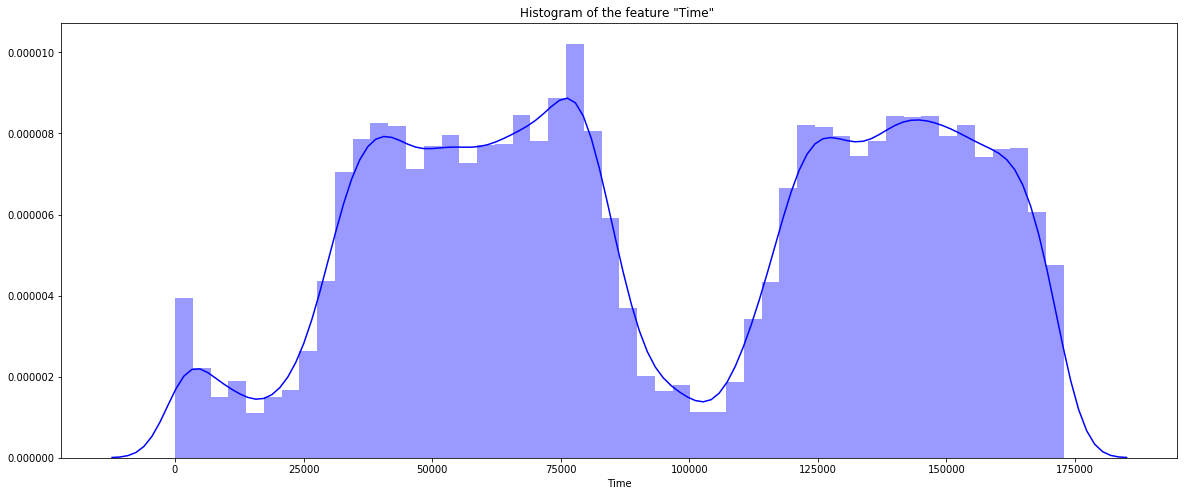

In [0]:
# Histogram - Time
plt.figure(figsize=(20,8));plt.title('Histogram of the feature "Time" ')
sns.distplot(raw_df['Time'], color='blue')
plt.show()

As the feature "Time" informs us the period in seconds betwenn the correspont transation and the first one, and the maximun value is 172792 seconds, we know that we are looking at transactions made in a period of approximatelly 48 hours, or in other words, 2 whole days.

It`s possible to see that the volume of transactions is high during a long period, and then falls down for a shorter one. This pattern shows to repeat itself periodically.

As the exact time of the first transaction were not provided, it`s no possible to say much more, but probably the period where the volume of transactions peaks (for approximately 13 hours) is the day time (from 6:00 to 19:00).

**Feature Amount**

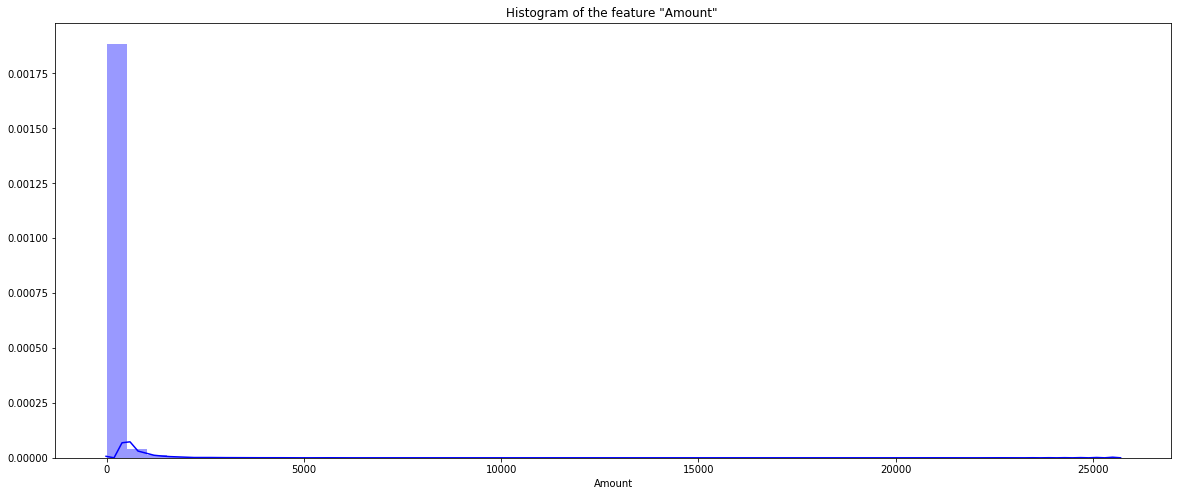

In [0]:
# Histogram - Time
plt.figure(figsize=(20,8));plt.title('Histogram of the feature "Amount" ')
sns.distplot(raw_df['Amount'], color='blue')
plt.show()

It`s possible to see on the histogram above that the feature Amount is skewed to the right.

It`s mean is EU 88.34, while it's median is EU 22.00. This happens as there is one single transaction with the value of EU 25691.16;

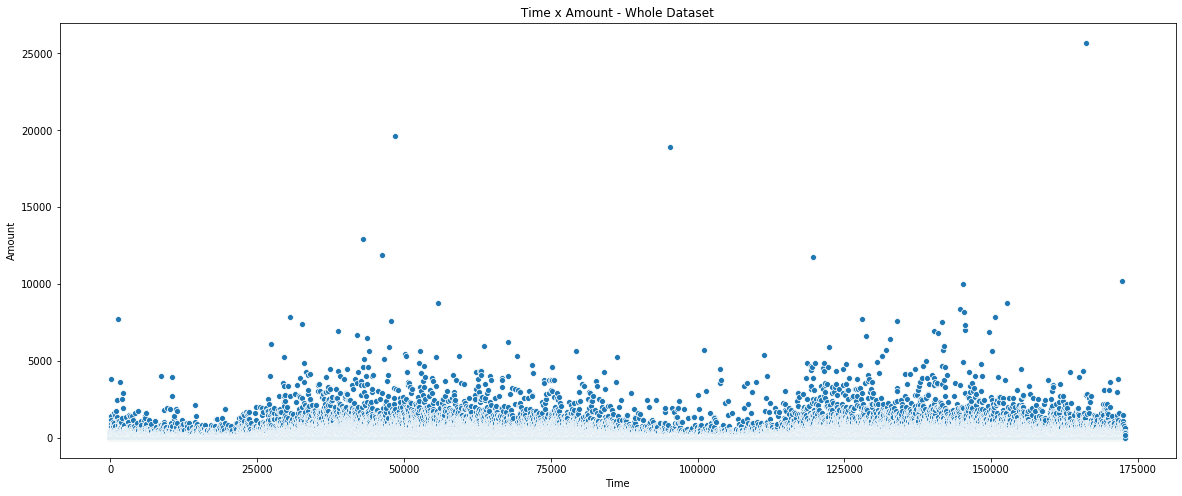

In [0]:
# scatter plot Time x Amount

plt.figure(figsize=(20,8));plt.title(' Time x Amount - Whole Dataset ')
sns.scatterplot(x='Time', y='Amount', data=raw_df);

**Feature Class**


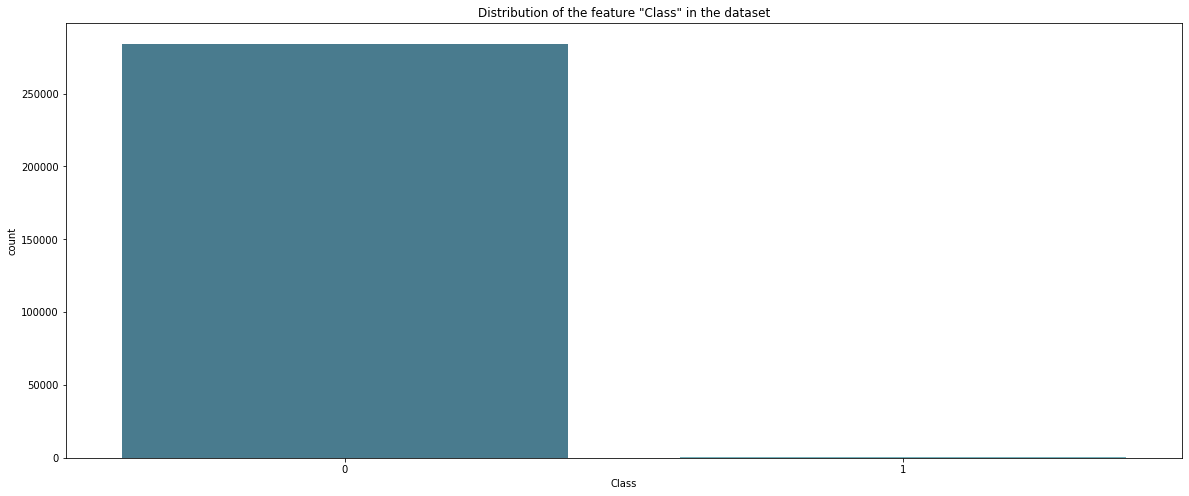

In [0]:
# Class distribution in the dataset
plt.figure(figsize=(20,8));plt.title('Distribution of the feature "Class" in the dataset')
labels_plot = sns.countplot(raw_df['Class'], palette="GnBu_d")

In [0]:
number_frauds = raw_df['Class'].value_counts()[1]
percent_number_frauds = number_frauds/raw_df.shape[0]

print(" Fraudulent Transactions in the Dataset:\t{} \n % of Fraudulent Transactions in the Dataset:\t{} % ".format(number_frauds, percent_number_frauds))
print("\n")

 Fraudulent Transactions in the Dataset:	492 
 % of Fraudulent Transactions in the Dataset:	0.001727485630620034 % 




We can see here that the dataset is unbalanced: Only 492 of the 284807 transactions were fraudulent.

Unbalanced datasets are a problem for machine learning algorithims, and we shall deal with it during the preprocessing step.



**Fraudulent Transactions**

As the number of fraudulent transactions in our dataset is really small compared to the number of samples, any patterns or interesting characteristics could be hiden when we analyse the whole set.

Let's have a look on the particular set of fraudulent transactions, and check if their behavior differ from the other ones:

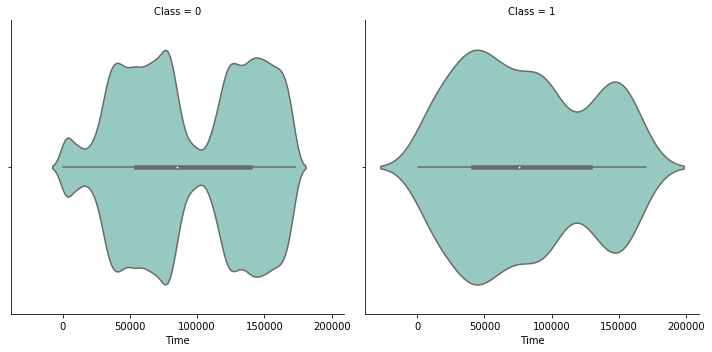

In [0]:
# Violin plot for Time x Class

class_time = sns.catplot(x='Time',col='Class', data=raw_df, kind="violin", palette="Set3")

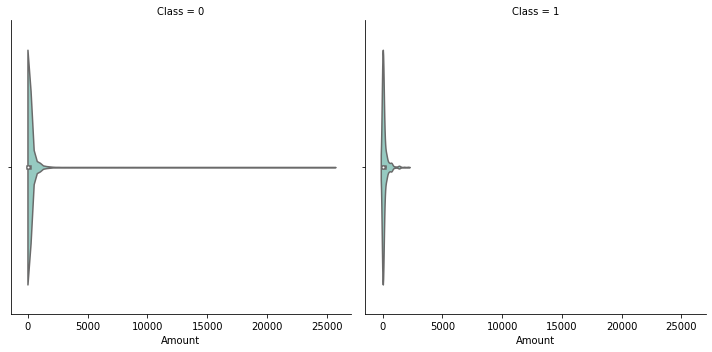

In [0]:
# Violin plot for Time x Class

class_amount = sns.catplot(x='Amount',col='Class', data=raw_df, kind="violin", palette="Set3")

In [0]:
# Dataframe of Fraudulent transactions

fraud_df = raw_df[raw_df['Class'] == 1]

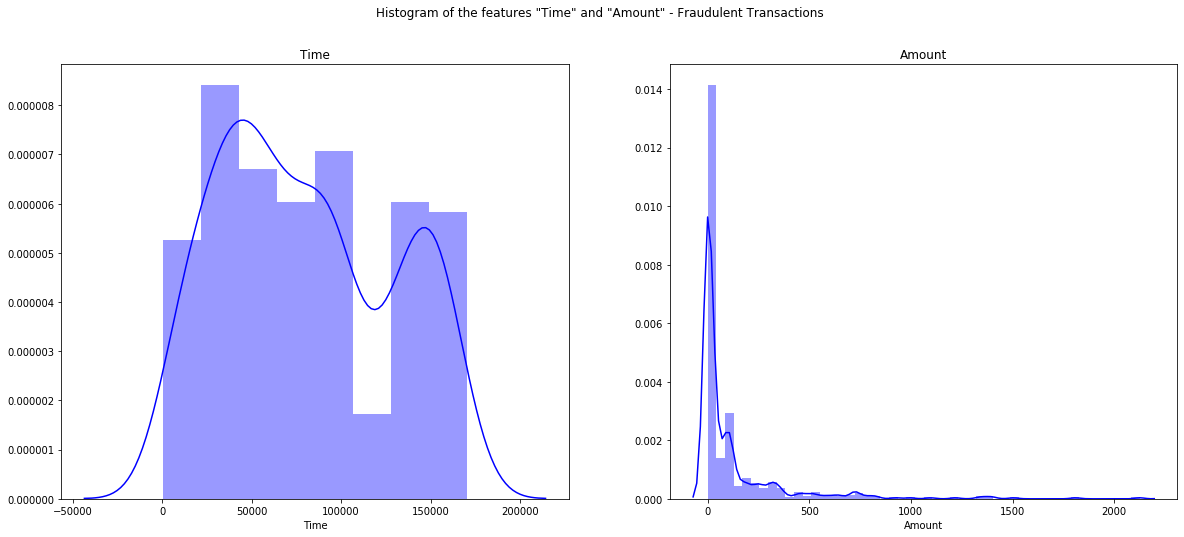

In [0]:
fig, (axis1, axis2) = plt.subplots(1,2, figsize=(20,8))
plt.suptitle('Histogram of the features "Time" and "Amount" - Fraudulent Transactions ')
plt.sca(axis1)
plt.title("Time")
plt.sca(axis2)
plt.title("Amount")
sns.distplot(fraud_df['Time'], color='blue', ax= axis1)
sns.distplot(fraud_df['Amount'], color='blue', ax= axis2)
plt.show()

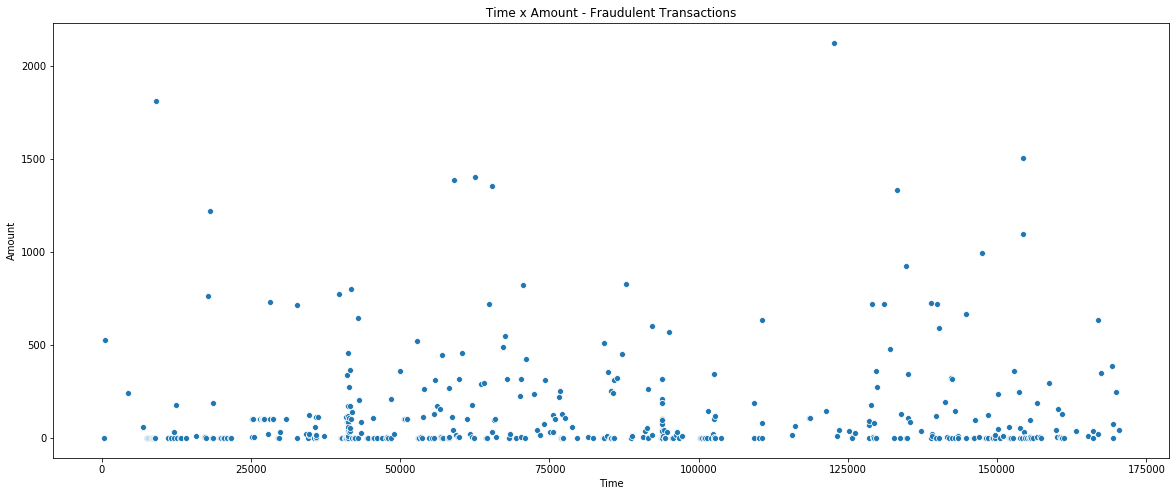

In [0]:
# scatter plot Time x Amount

plt.figure(figsize=(20,8));plt.title(' Time x Amount - Fraudulent Transactions ')
sns.scatterplot(x='Time', y='Amount', data=fraud_df);

The graphs above show us that there is no particular pattern in terms of Amount and Time for the fraudulent transactions.

They are distributed in time in a similiar way of the whole set of transactions, and the same happens to the amount transfered.

**Correlations**

It's interesting to check if there are any significant correlations between our predictors and the target varible (the feature *Class*).


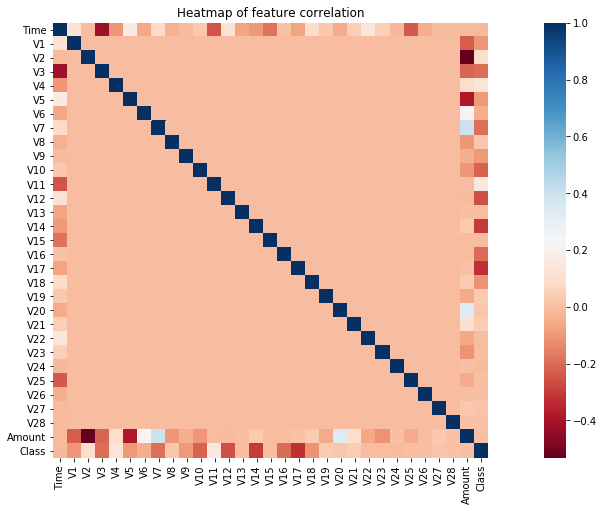

In [0]:
# Correlations
corr = raw_df.corr()

#Heatmap
plt.figure(figsize=(20,8))
plt.title('Heatmap of feature correlation')
sns.heatmap(data=corr, cmap='RdBu', fmt='.2f', square=True, annot=False)


The heatmap shows us that, besides the fact of the high number of features, there aren't significant correlations. Just some of the PCA features have a negative correlation with the feature Class arround - 0.5.

Once again, the huge class imbalance might be hiding the importance of certain correlations with regards to our class variable.

# Step 4 - Preprocessing the Data

**Outliers**

Let's use the Interquartile Range Method to check if there are outliers on our dataset:

It makes no sense to check for outliers at the features time and class, so I'm going to remove them from the analysis.

[Interquartile Range Method (IQR)](https://www.thoughtco.com/what-is-the-interquartile-range-rule-3126244)

In [0]:
# create a checkpoint
prepr_df = raw_df.copy()

In [0]:
# defining IQR for the PCA features
features_iqr = prepr_df.columns[1:-2]
Q1 = prepr_df[features_iqr].quantile(0.25)
Q3 = prepr_df[features_iqr].quantile(0.75)
IQR = Q3 - Q1

# identifying outliers

outliers_idx_PCA = []

for i in features_iqr:
  for j in range(prepr_df.shape[0]):
    lower_bound = (Q1[i] - (1.5 * IQR[i]))
    upper_bound = (Q3[i] + (1.5 * IQR[i]))
    if (prepr_df[i][j] > upper_bound or prepr_df[i][j] < lower_bound):
      outliers_idx_PCA.append(j)


In [0]:
# Unique indexes of the identified outliers (PCA features)
outliers_PCA = np.unique(outliers_idx_PCA,)

# Number of identified outliers
len(outliers_PCA)

128657

In [0]:
128657/prepr_df.shape[0]

0.45173398125748315

As we can see, the Innerquartile Range Method have identified 128657 samples as outliers by analyzing the features which have been transformed with a PCA.

Unfortunately, this is about 45% of the entire dataset we have to work with. Bear in mind, that 492 fraudulent transactions into the entire set, and we might remove 50% of them by following the IQR result.



**Standardize the Data**

All the 28 PCA features are already standardized. Hence, we shall standardize also the features *Time* and *Amount* to avoid having data of different magnitude (scale) and add some bias to our predictions:



In [0]:
# define scaler as an object
fraud_scaler = StandardScaler()

In [0]:
# create the Custom Scaler class

class CustomScaler(BaseEstimator,TransformerMixin): 
    
    # init or what information we need to declare a CustomScaler object
    # and what is calculated/declared as we do
    
    def __init__(self,columns,copy=True,with_mean=True,with_std=True):
        
        # scaler is nothing but a Standard Scaler object
        self.scaler = StandardScaler(copy,with_mean,with_std)
        # with some columns 'twist'
        self.columns = columns
        self.mean_ = None
        self.var_ = None
        
    
    # the fit method, which, again based on StandardScale
    
    def fit(self, X, y=None):
        self.scaler.fit(X[self.columns], y)
        self.mean_ = np.mean(X[self.columns])
        self.var_ = np.var(X[self.columns])
        return self
    
    # the transform method which does the actual scaling

    def transform(self, X, y=None, copy=None):
        
        # record the initial order of the columns
        init_col_order = X.columns
        
        # scale all features that you chose when creating the instance of the class
        X_scaled = pd.DataFrame(self.scaler.transform(X[self.columns]), columns=self.columns)
        
        # declare a variable containing all information that was not scaled
        X_not_scaled = X.loc[:,~X.columns.isin(self.columns)]
        
        # return a data frame which contains all scaled features and all 'not scaled' features
        # use the original order (that you recorded in the beginning)
        return pd.concat([X_not_scaled, X_scaled], axis=1)[init_col_order]

In [0]:
# declare a scaler object, specifying the columns we want to scale
fraud_scaler = CustomScaler(['Time','Amount'])

# fit the data (calculate mean and standard deviation); they are automatically stored inside the object 
fraud_scaler.fit(prepr_df)

# standardizes the data, using the transform method 
prepr_df = fraud_scaler.transform(prepr_df)

**Balancing the Dataset**

Before running any prediction algorithm, it's necessary to balance the dataset in regards of the feature *Class*.

I'm going to use the under-sampling technique.

First of all, I'm going to split the dataset in two:

*   Training dataset - Which I'm going to use to train our predictive model;
*   Test dataset - Which I'm going to use to measure how good our predictive model is at identifying fraudulent transactions;

Then, I'll use the under-sampling to balance the training set:





In [0]:
# Splitting the dataset into training and test

target = prepr_df['Class']
inputs = prepr_df.drop('Class', axis=1)

X_train, X_test, y_train, y_test = train_test_split(inputs, target, stratify=target, test_size=0.1, random_state = 20)


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


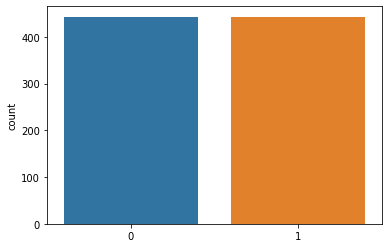

In [0]:
# Balancing the train dataset using under-sampling

rand_under_sampler = RandomUnderSampler()
X_train_rus, y_train_rus = rand_under_sampler.fit_sample(X_train,y_train)

# Check class balance
sns.countplot(y_train_rus);

# Step 5 - Modeling


**Logistic Regression Model**

In [0]:
# Creating a logistic regression object
log_reg = LogisticRegression()

# fit our train inputs
log_reg.fit(X_train_rus,y_train_rus)


# checking the accuracy with train data
acc_logReg_train = round(log_reg.score(X_train, y_train) * 100, 2)
print("Training Accuracy of the Logistic Regression Model: {} %".format(acc_logReg_train))

Training Accuracy of the Logistic Regression Model: 96.84 %


In [0]:
# predict our test inputs
y_hat_lr = log_reg.predict(X_test)

# checking the accuracy with train data
acc_logReg_test = round(log_reg.score(X_test, y_test) * 100, 2)
print("Test Accuracy of the Logistic Regression Model: {} %".format(acc_logReg_test))

Test Accuracy of the Logistic Regression Model: 96.79 %


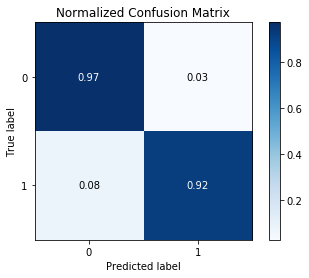

In [0]:
# Confusion Matrix
skplt.metrics.plot_confusion_matrix(y_test, y_hat_lr, normalize=True)

In [0]:
# AUC
print("AUC: {:.4f}\n".format(roc_auc_score(y_test,y_hat_lr)))

AUC: 0.9432



**Decision Tree**

In [0]:
# Creating a decision tree object
dec_tree = DecisionTreeClassifier()

# fit our train inputs
dec_tree.fit(X_train_rus,y_train_rus)


# checking the accuracy with train data
acc_dectree_train = round(dec_tree.score(X_train, y_train) * 100, 2)
print("Training Accuracy of the Logistic Regression Model: {} %".format(acc_dectree_train))

Training Accuracy of the Logistic Regression Model: 89.72 %


In [0]:
# predict our test inputs
y_hat_dt = dec_tree.predict(X_test)

# checking the accuracy with train data
acc_dectree_test = round(dec_tree.score(X_test, y_test) * 100, 2)
print("Test Accuracy of the Logistic Regression Model: {} %".format(acc_dectree_test))

Test Accuracy of the Logistic Regression Model: 89.66 %


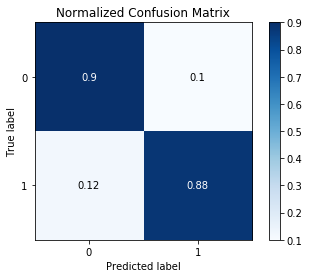

In [0]:
# Confusion Matrix
skplt.metrics.plot_confusion_matrix(y_test, y_hat_dt, normalize=True)

In [0]:
# AUC
print("AUC: {:.4f}\n".format(roc_auc_score(y_test,y_hat_dt)))

AUC: 0.8871

